# Essentials Modules

In [333]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Data...

In [232]:
train_df=pd.read_csv(r'C:\Users\mwael\OneDrive\Desktop\after_cource\projects\titanic\titanic_data\train.csv')
test_df=pd.read_csv(r'C:\Users\mwael\OneDrive\Desktop\after_cource\projects\titanic\titanic_data\test.csv')
test_submission=pd.read_csv(r'C:\Users\mwael\OneDrive\Desktop\after_cource\projects\titanic\titanic_data\gender_submission.csv')

# Read Training & Testing Data

In [233]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [235]:
if 'PassengerId' in test_df.columns:
    test_df.drop(['PassengerId','Name','Age','Ticket','Cabin'],axis=1,inplace=True)

In [236]:
test_df['famly']=test_df['Parch']+test_df['SibSp']
test_df.head(5)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,famly
0,3,male,0,0,7.8292,Q,0
1,3,female,1,0,7.0000,S,1
2,2,male,0,0,9.6875,Q,0
3,3,male,0,0,8.6625,S,0
4,3,female,1,1,12.2875,S,2


In [237]:
test_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Preprocessing

In [238]:
if 'PassengerId' in test_submission.columns:    
    test_submission.drop('PassengerId',axis=1,inplace=True)

In [239]:
test_submission.isnull().sum()

Survived    0
dtype: int64

In [240]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [241]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [243]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [244]:
if 'PassengerId' in train_df.columns:
    train_df.drop(['PassengerId','Name','Age','Ticket','Cabin'],axis=1,inplace=True)

In [245]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [246]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [247]:
train_df['Survived'].unique()

array([0, 1], dtype=int64)

In [248]:
encoder=LabelEncoder()
train_df['Sex']=encoder.fit_transform(train_df['Sex'])
train_df['Embarked']=encoder.fit_transform(train_df['Embarked'])
train_df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


In [249]:
test_df['Sex']=encoder.fit_transform(test_df['Sex'])
test_df['Embarked']=encoder.fit_transform(test_df['Embarked'])
test_df.head(5)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,famly
0,3,1,0,0,7.8292,1,0
1,3,0,1,0,7.0000,2,1
2,2,1,0,0,9.6875,1,0
3,3,1,0,0,8.6625,2,0
4,3,0,1,1,12.2875,2,2


In [250]:
train_df['famly']=train_df['Parch']+train_df['SibSp']
train_df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,famly
0,0,3,1,1,0,7.2500,2,1
1,1,1,0,1,0,71.2833,0,1
2,1,3,0,0,0,7.9250,2,0
3,1,1,0,1,0,53.1000,2,1
4,0,3,1,0,0,8.0500,2,0


# Correlatoin Matrics

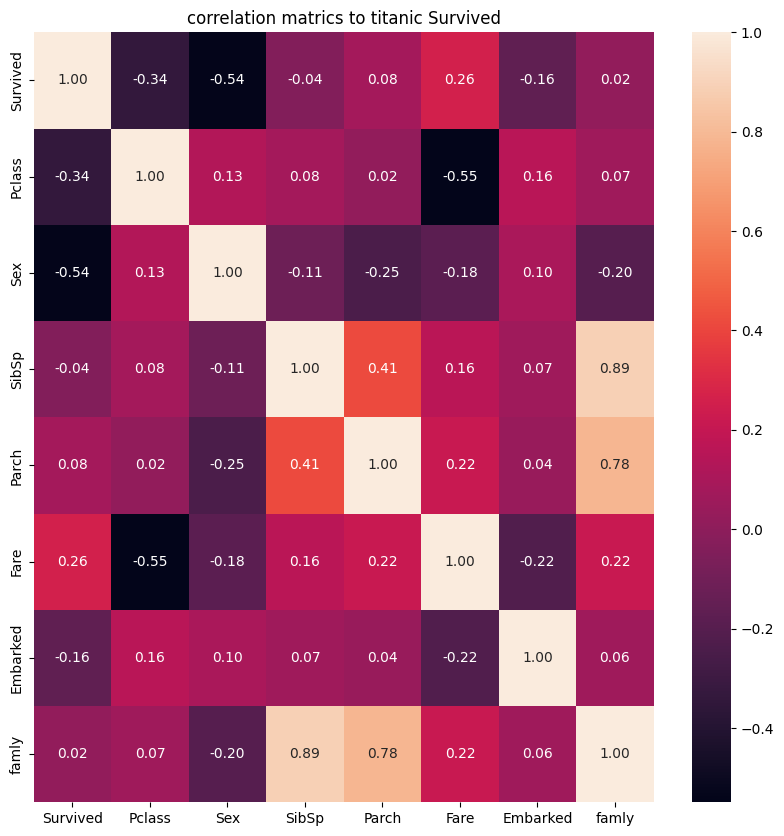

In [320]:
corr_mat=train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True,fmt='0.2f',color='r')
plt.title('correlation matrics to titanic Survived')
plt.show()

# Split Data

In [252]:
x=train_df.drop('Survived',axis=1)
y=train_df['Survived']

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [254]:
x_train.shape,y_train.shape 

((712, 7), (712,))

In [255]:
x_test.shape , y_test.shape

((179, 7), (179,))

In [256]:
type(x_train) , type(y_train)


(pandas.core.frame.DataFrame, pandas.core.series.Series)

# Decision Tree Model 

In [ ]:
decision_model=DecisionTreeClassifier(max_depth=3)


In [327]:
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [328]:
decision_model.score(test_df,test_submission)

0.9856459330143541

In [331]:
import joblib
joblib.dump(decision_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

# Random Forest Model

In [ ]:

randome_forestModel=RandomForestClassifier(max_depth=4)

In [303]:
randome_forestModel.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [304]:
randome_forestModel.score(test_df,test_submission)

0.9425837320574163

In [318]:
import joblib


joblib.dump(randome_forestModel, 'Random_forest_model.pkl')

['Random_forest_model.pkl']

# Logistic Regression Model

In [ ]:
logistic_model=LogisticRegression(max_iter=10000)

In [315]:
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [316]:
logistic_model.score(x_test,y_test)

0.7597765363128491

In [319]:
import joblib

joblib.dump(logistic_model, 'logistic_model.pkl')

['logistic_model.pkl']

# finnaly Decision Tree model is the Best model

In [332]:
import joblib
import numpy as np

model = joblib.load(r'C:\Users\mwael\OneDrive\Desktop\after_cource\projects\titanic\saved_model\decision_tree_model.pkl')

def get_input():
    pclass = int(input("Enter Passenger Class (1, 2, 3): "))
    sex = input("Enter Sex (Male/Female): ")
    sibsp = int(input("Enter Number of Siblings/Spouses aboard (SibSp): "))
    parch = int(input("Enter Number of Parents/Children aboard (Parch): "))
    family=sibsp+parch
    fare = float(input("Enter Fare: "))
    embarked = input("Enter Port of Embarkation (Southampton/Cherbourg/Queenstown): ")

    sex = 1 if sex.lower() == 'male' else 0

    embarked_dict = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}
    embarked = embarked_dict.get(embarked, -1)  

    if embarked == -1:
        print("Invalid port of embarkation!")
        return None

    features = np.array([[pclass, sex, sibsp, parch, fare, embarked,family]])
    return features

features = get_input()

if features is not None:
    prediction = model.predict(features)

    if prediction[0] == 1:
        print("This person would have survived!")
    else:
        print("This person would not have survived.")


This person would not have survived.


c:\Users\mwael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
